Continuing work done in nyt_eda_2_byline_cleaning.ipynb
- look for clustering in publication dates of articles that do not have a lead paragraph
- look for word count info, are there articles with word counts considered outside of the normal range?

In [11]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
from datetime import datetime
import statistics as st
from scipy import stats

In [2]:
#load data
with gzip.open('rest_byline_cleaned.gz', 'rb') as f:
    rest = pd.read_csv(f)
print(rest.shape)

with gzip.open('front_pages_byline_cleaned.gz', 'rb') as f:
    front_pages = pd.read_csv(f)
print(front_pages.shape)

C:\Users\scj41343\AppData\Local\Temp\ipykernel_32236\1894458495.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  rest = pd.read_csv(f)


(392845, 35)
(21917, 31)


In [3]:
#determine N/A counts for rest df
rest.isna().sum()

Unnamed: 0             0
abstract            1020
weburl                 0
snippet             6521
leadparagraph       4352
printsection      209303
printpage         209293
source                 0
multimedia             0
headline               0
keywords               0
pubdate                0
documenttype           0
newsdesk           12664
sectionname          327
subsectionname    239420
byline                 0
typeofmaterial      7589
id                     0
wordcount              0
uri                    0
year                   0
numsubjects            0
numpersons             0
numglocs               0
numcreatives           0
numorgs                0
glocs                  0
persons                0
subjects               0
orgs                   0
cworks                 0
byline_extract     34165
byline_confirm     35932
byline_match           0
dtype: int64

In [4]:
#determine N/A counts for front pages df
front_pages.isna().sum()

Unnamed: 0           0
abstract             0
weburl               0
snippet              2
leadparagraph       66
printsection         0
printpage            0
source               0
multimedia           0
headline             0
keywords             0
pubdate              0
documenttype         0
newsdesk            13
sectionname          0
subsectionname    8844
byline               0
typeofmaterial       0
id                   0
wordcount            0
uri                  0
year                 0
numsubj              0
numpersons           0
numglocs             0
numcreatives         0
persons              0
subjects             0
byline_extract      40
byline_confirm      44
byline_match         0
dtype: int64

In [5]:
articlesrest = rest[rest['documenttype'] == 'article']
articlesfp = front_pages[front_pages['documenttype'] == 'article']

In [6]:
#extract all rows with N/A for lead paragraph
leadparamissrest = articlesrest[~articlesrest['leadparagraph'].notna()]
#reset index to make df nice
leadparamissrest = leadparamissrest.reset_index(drop=True)
#extract only pubdate column for easier computation
leadparamissrest = leadparamissrest['pubdate']
#extract only the date information from the string (time is not important for this) and convert to datetime
for i in range(0,leadparamissrest.shape[0]):
    leadparamissrest[i] = leadparamissrest[i][:10]
    leadparamissrest[i] = datetime.strptime(leadparamissrest[i], '%Y-%m-%d').date()


pubdate
2015-10-22    7
2017-12-06    7
2016-01-14    7
2015-01-26    7
2014-09-29    7
             ..
2018-05-18    1
2018-05-16    1
2018-05-11    1
2018-05-10    1
2024-06-28    1
Name: count, Length: 1922, dtype: int64


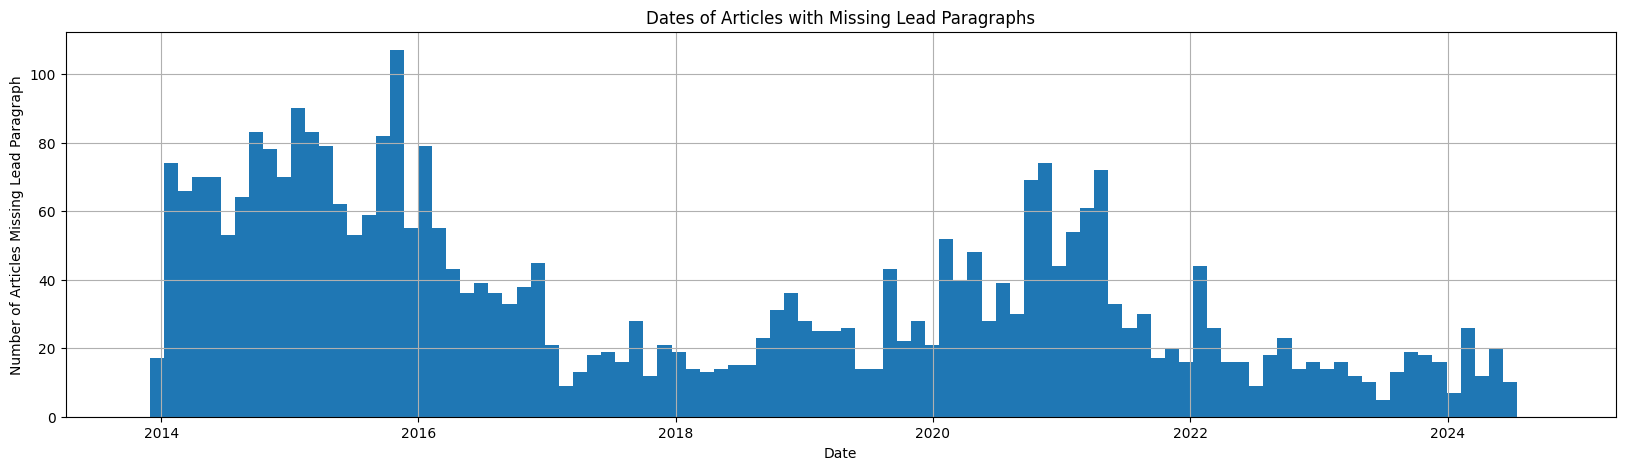

In [7]:
#plot histogram of dates
plt.figure(figsize=(20,5))
leadparamissrest.hist(bins=100,range=[16000, 20000])
plt.title('Dates of Articles with Missing Lead Paragraphs')
plt.xlabel('Date')
plt.ylabel("Number of Articles Missing Lead Paragraph")
#print counts for another way to see clusters of dates where the lead paragraph is missing
count = leadparamissrest.value_counts()
print(count)

In [8]:
#extract all rows with N/A for lead paragraph
leadparamissfp = articlesfp[~articlesfp['leadparagraph'].notna()]
#reset index to make df nice
leadparamissfp = leadparamissfp.reset_index(drop=True)
#extract only pubdate column for easier computation
leadparamissfp = leadparamissfp['pubdate']
#extract only the date information from the string (time is not important for this) and convert to datetime
for i in range(0,leadparamissfp.shape[0]):
    leadparamissfp[i] = leadparamissfp[i][:10]
    leadparamissfp[i] = datetime.strptime(leadparamissfp[i], '%Y-%m-%d').date()

pubdate
2020-11-07    3
2020-10-20    2
2020-10-14    2
2015-12-18    1
2021-01-09    1
             ..
2020-10-21    1
2020-10-23    1
2020-11-01    1
2020-11-02    1
2024-06-15    1
Name: count, Length: 62, dtype: int64


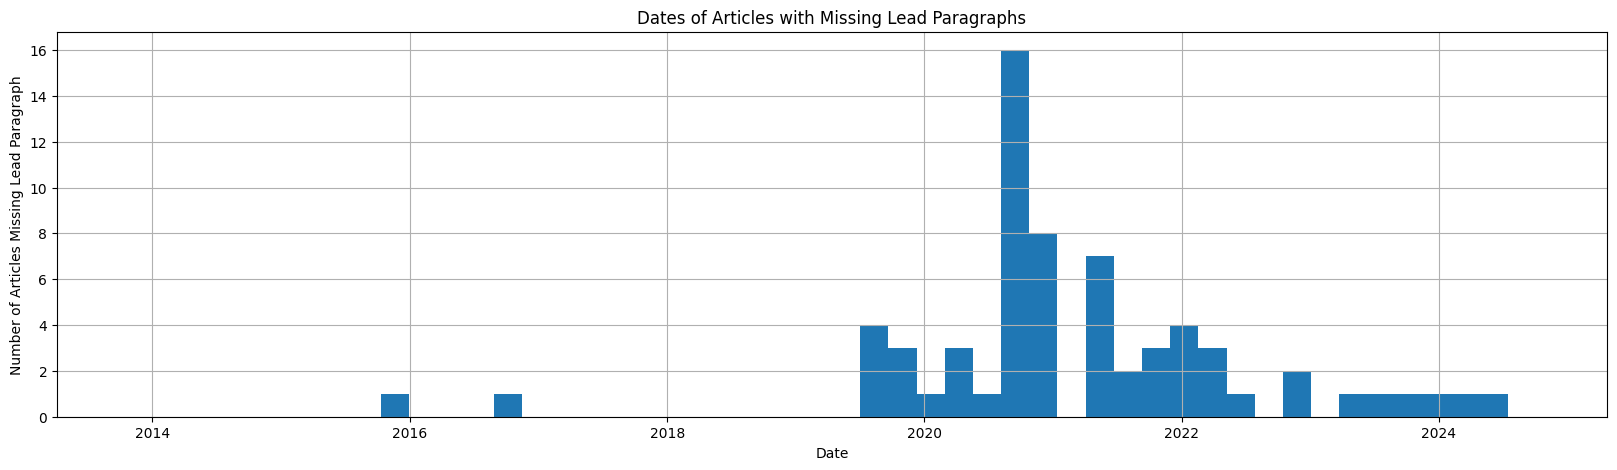

In [9]:
#plot histogram of dates
plt.figure(figsize=(20,5))
leadparamissfp.hist(bins=50,range=[16000, 20000])
plt.title('Dates of Articles with Missing Lead Paragraphs')
plt.xlabel('Date')
plt.ylabel("Number of Articles Missing Lead Paragraph")
count = leadparamissfp.value_counts()
#print counts for another way to see clusters of dates where the lead paragraph is missing
print(count)

In [13]:
#extract wordcounts
wordcountrest = articlesrest['wordcount']
wordcountfp = articlesfp['wordcount']

#determine average, min, and max for both front page and non-front pages
print("Average Word Count for Non-Front Page Articles")
print(round(st.mean(wordcountrest),0), end='\n\n')

print("Average Word Count for Front Page Articles")
print(round(st.mean(wordcountfp),0), end='\n\n')

print("Minimum Word Count for Non-Front Page Articles")
print(min(wordcountrest), end='\n\n')

print("Minimum Word Count for Front Page Articles")
print(min(wordcountfp), end='\n\n')

print("Maximum Word Count for Non-Front Page Articles")
print(max(wordcountrest), end='\n\n')

print("Maximum Word Count for Front Page Articles")
print(max(wordcountfp), end='\n\n')

stats.ttest_ind(wordcountfp, wordcountrest, equal_var=False)


Average Word Count for Non-Front Page Articles
839.0

Average Word Count for Front Page Articles
1602.0

Minimum Word Count for Non-Front Page Articles
0.0

Minimum Word Count for Front Page Articles
18

Maximum Word Count for Non-Front Page Articles
25786.0

Maximum Word Count for Front Page Articles
10250



TtestResult(statistic=174.7331213619569, pvalue=0.0, df=26082.52460012072)

In [15]:
#how many articles have word counts of 0?
print(wordcountrest[wordcountrest == 0].count())

print(wordcountfp[wordcountfp == 0].count())

831
0
